<table align="left" width=100%>
    <tr>
        <td width="10%">
            <img src="title.png">
        </td>
        <td>
            <div align="left">
                <font color="#21618C" size=8px>
                  <b>Biomedical Text Classification
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

## Problem statement

The goal of this project is to create an accurate, generalizable, and scalable text categorization Machine learning Model based on NLP in order to simplify the present information extraction process..

### Data Definition

**Target** this column contain target variable like; Thyroid Cancer, Colon Cancer, Lung Cancer.

**Text** Column contain clinical report text relation to target variable.

# Table of Contents

### 1. Import libraries.
### 2. Read Data
### 3. Set option
### 4. Data Analysis
### 5. EDA
### 6. Text Preprocessing
### 7. Model Building
### 8. Model Evaluation

## 1.Important Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
nltk.download('punkt')
import re
from textblob import TextBlob

from nltk.stem.porter import PorterStemmer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## 2. Set option

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Now we make necessary changes to :<br><br>
1. Display complete data frames<br>
2. To avoid the exponential number<br>
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [2]:
# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

# use below code to convert the 'exponential' values to float
np.set_printoptions(suppress=True)

## 3.Read Data

In [3]:
# Latin1 encoding accept any possible byte as input and convert it to the unicode character of same code.

df = pd.read_csv(r'./data.csv', encoding="latin-1")
df.head()

,Unnamed: 0,0,a
0,0,Thyroid_Cancer,Thyroid surgery in children in a single insti...
1,1,Thyroid_Cancer,""" The adopted strategy was the same as that us..."
2,2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...
3,3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...
4,4,Thyroid_Cancer,This study aimed to investigate serum matrix ...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7570 entries, 0 to 7569
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  7570 non-null   int64 
 1   0           7570 non-null   object
 2   a           7570 non-null   object
dtypes: int64(1), object(2)
memory usage: 177.5+ KB


#### Dimensions of the data

In [5]:
# 'shape'  gives the total number of rows and columns in the data set

df.shape

(7570, 3)

# 4. Data Analysis 

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Data analysis is the process of cleaning and transforming raw data before building predictive models. <br><br>
                        Here, we analyze and prepare data to perform classification techniques:<br>
                        1.Deleting unwanted column<br>
                        2.Renaming Column Name<br>
                        3. Check data types. Ensure your data types are correct. Refer data definitions to validate <br>
                        4. Study summary statistics<br>
                        5. Check for missing values<br><br>
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### 4.1 Drop unnamed column

In [6]:
# remove the unnecassary columns in the dataset
df.drop([ 'Unnamed: 0' ], axis=1, inplace = True)

### 4.2 Change Column Names

In [7]:
#Rename the column names
df.rename({ '0' : 'Target', 'a' : 'Text' }, axis = 1, inplace = True )

In [8]:
df.head()

,Target,Text
0,Thyroid_Cancer,Thyroid surgery in children in a single insti...
1,Thyroid_Cancer,""" The adopted strategy was the same as that us..."
2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...
3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...
4,Thyroid_Cancer,This study aimed to investigate serum matrix ...


In [9]:
df['Target'].value_counts()

Thyroid_Cancer    2810
Colon_Cancer      2580
Lung_Cancer       2180
Name: Target, dtype: int64

### 4.5 checking missing values

In [10]:
df.isnull().sum()

Target    0
Text      0
dtype: int64

# EDA Process

**Exploratory Data Analysis (EDA) is an approach to analyze the data using visual techniques.**

**A Pie Chart is a type of graph that displays data in a circular graph. 
The pieces of the graph are proportional to the fraction of the whole in each category. 
In other words, each slice of the pie is relative to the size of that category in the group as a whole.**

In [11]:
#Let's count the label values in the dataset
label=df['Target'].value_counts()
label

Thyroid_Cancer    2810
Colon_Cancer      2580
Lung_Cancer       2180
Name: Target, dtype: int64

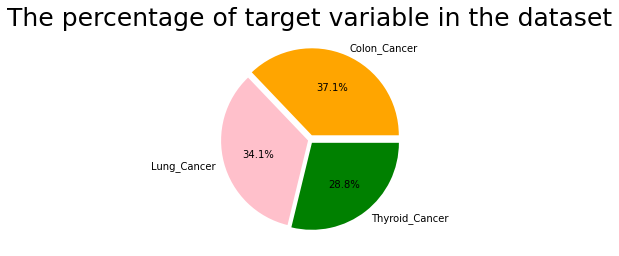

In [12]:
#Let's visualize the above information on the dataset
plt.pie(label, autopct="%.1f%%", labels=['Colon_Cancer', 'Lung_Cancer', 'Thyroid_Cancer'],explode=[0.06,0.02,0.04], colors=['orange','pink','green'])
plt.title("The percentage of target variable in the dataset",fontsize=25)
plt.show()

### KDE Plot

**The KDE Plot, also known as the Kernel Density Estimate, is a tool for displaying the Probability Density of a continuous variable. It illustrates the probability density in a continuous variable at various values.**

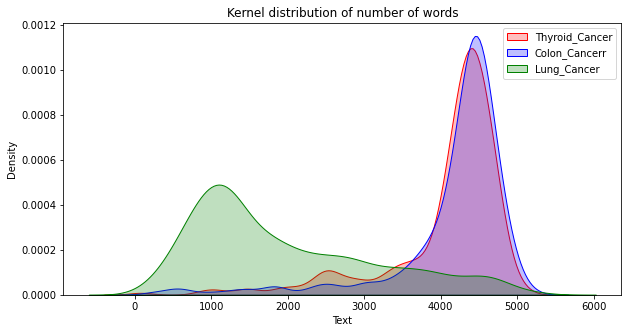

In [13]:
num_1 = df[df['Target']== 'Thyroid_Cancer']['Text'].apply(lambda x: len(x.split()))
num_2 = df[df['Target']== 'Colon_Cancer']['Text'].apply(lambda x: len(x.split()))
num_3 = df[df['Target']== 'Lung_Cancer']['Text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10,5))
sns.kdeplot(num_1, shade=True, color = 'red').set_title('Kernel distribution of number of words')
sns.kdeplot(num_2, shade=True, color = 'blue')
sns.kdeplot(num_3, shade=True, color = 'green')

plt.legend(labels=['Thyroid_Cancer', 'Colon_Cancerr', 'Lung_Cancer'])

### Word Cloud
**is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.
It shows the popularity of words or phrases by making the most frequently used words appear larger or bolder compared with the other words around them.**

In [14]:
from textblob import TextBlob
from textblob import Word
from wordcloud import WordCloud


Thyroid_Cancer


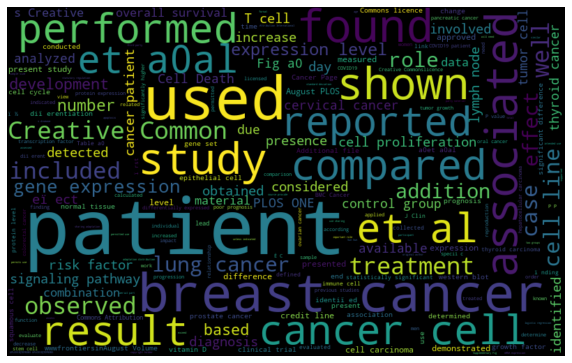

Colon_Cancer


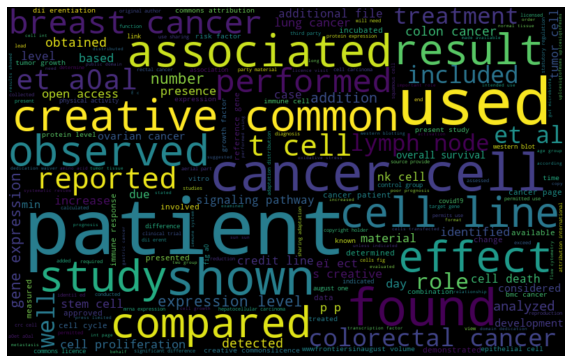

Lung_Cancer


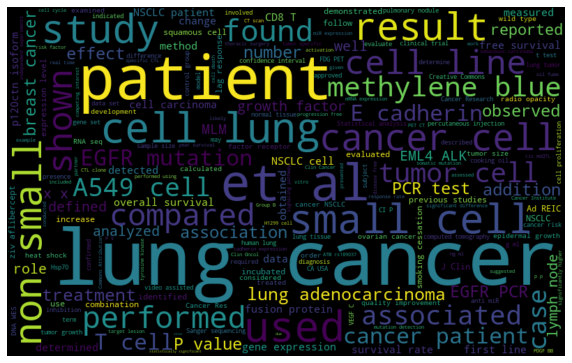

In [15]:
for i in df['Target'].unique():
    print(i)
    all_words = ' '.join([text for text in df.loc[df['Target'].str.contains(i),'Text']])
    from wordcloud import WordCloud
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

# Text Data Preprocessing

### Natural Language Processing ( NLP )

**NLP is a field in machine learning with the ability of a computer to understand, analyze, 
manipulate, and potentially generate human language.**

### Pre-processing text data

Cleaning up the text data is necessary to highlight attributes that you're going to want your machine learning system to pick up on. Cleaning (or pre-processing) the data typically consists of a number of steps:
1. **Remove punctuation**
2. **Tokenization**
3. **Remove stopwords**
4. **Lemmatize/Stem**


### Deleting the numbers from the text.

In [16]:
#Define the function for remove the numbers in the dataset
def remove_number(text):
     #Create loop for remove the digits in the dataset
    text="".join([i for i in text if not i.isdigit()])
     #Return to the dataset
    return text
#Apply the above function to the dataset
df['Text']=df['Text'].apply(remove_number)

In [17]:
df.head()

,Target,Text
0,Thyroid_Cancer,Thyroid surgery in children in a single insti...
1,Thyroid_Cancer,""" The adopted strategy was the same as that us..."
2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...
3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...
4,Thyroid_Cancer,This study aimed to investigate serum matrix ...


In [18]:
#Define the function to clean the text
def clean_text(text):
    pattern = r'[^a-zA-Z\s]'
    text=re.sub(pattern,'',text)
    return text


In [19]:
#Apply to the function to the dataset
df['Text']=df['Text'].apply(clean_text)
df.head()

,Target,Text
0,Thyroid_Cancer,Thyroid surgery in children in a single insti...
1,Thyroid_Cancer,The adopted strategy was the same as that use...
2,Thyroid_Cancer,coronary arterybypass grafting thrombosis brin...
3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...
4,Thyroid_Cancer,This study aimed to investigate serum matrix ...


## Remove stopwords

###### This is a important task to remove words that doesn't make anything like 'i','me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves'....and many more.

In [20]:
#Create function to the remove the stopwods
names = ['Colon_Cancer', 'Lung_Cancer', 'Thyroid_Cancer']
def remove_stop_words(text):
    stop_words = stopwords.words('english')
    for name in names:
        stop_words.append(name)
    return " ".join([w.lower() for w in text.split() if w.lower() not in stop_words])

In [21]:
df['Text']=df['Text'].apply(remove_stop_words)


In [22]:
df.head()

,Target,Text
0,Thyroid_Cancer,thyroid surgery children single institution os...
1,Thyroid_Cancer,adopted strategy used prior years based four e...
2,Thyroid_Cancer,coronary arterybypass grafting thrombosis brin...
3,Thyroid_Cancer,solitary plasmacytoma sp skull uncommon clinic...
4,Thyroid_Cancer,study aimed investigate serum matrix metallopr...


### Tokenization

**Tokenization is taking a text or set of text and spliting it up into its individual words.**
### OR
**Tokenization is the process of tokenizing or splitting a string, text into a list of tokens.**

In [23]:
#Define the tokenize function 
def tokenize(text):
    return word_tokenize(text)

In [24]:
df['Text']=df['Text'].apply(tokenize)


In [25]:
df.head()

,Target,Text
0,Thyroid_Cancer,"[thyroid, surgery, children, single, instituti..."
1,Thyroid_Cancer,"[adopted, strategy, used, prior, years, based,..."
2,Thyroid_Cancer,"[coronary, arterybypass, grafting, thrombosis,..."
3,Thyroid_Cancer,"[solitary, plasmacytoma, sp, skull, uncommon, ..."
4,Thyroid_Cancer,"[study, aimed, investigate, serum, matrix, met..."


In [26]:
#removing special character
#A special character is a character that is not an alphabetic or numeric character. Punctuation marks and other symbols are examples of special characters
def remove_special_char(text):
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    return y

In [27]:
df['Text']=df['Text'].apply(remove_special_char)


In [28]:
df.head()

,Target,Text
0,Thyroid_Cancer,"[thyroid, surgery, children, single, instituti..."
1,Thyroid_Cancer,"[adopted, strategy, used, prior, years, based,..."
2,Thyroid_Cancer,"[coronary, arterybypass, grafting, thrombosis,..."
3,Thyroid_Cancer,"[solitary, plasmacytoma, sp, skull, uncommon, ..."
4,Thyroid_Cancer,"[study, aimed, investigate, serum, matrix, met..."


### Stemming and Lemmetization

#### Main differences between stemming and lemmatization:


Stemming algorithms work by cutting off the end or the beginning of the word, taking into account a list of common prefixes and suffixes that can be found in an inflected word. This indiscriminate cutting can be successful in some occasions, but not always, and that is why we affirm that this approach presents some limitations. Below we illustrate the method with examples in both English and Spanish.

Lemmatization, on the other hand, takes into consideration the morphological analysis of the words. To do so, it is necessary to have detailed dictionaries which the algorithm can look through to link the form back to its lemma. Again, you can see how it works with the same example words.

Another important difference to highlight is that a lemma is the base form of all its inflectional forms, whereas a stem isn’t

In [29]:
#Create a function to the stemming processs
ps=PorterStemmer()

def stemming(text):
 #Create a empty list 
    y=[]
#Create a for loop for text in list    
    for i in text:
        y.append(ps.stem(i))
    return y

In [30]:
df['Text']=df['Text'].apply(stemming)

In [31]:
df.head()

,Target,Text
0,Thyroid_Cancer,"[thyroid, surgeri, children, singl, institut, ..."
1,Thyroid_Cancer,"[adopt, strategi, use, prior, year, base, four..."
2,Thyroid_Cancer,"[coronari, arterybypass, graft, thrombosi, bri..."
3,Thyroid_Cancer,"[solitari, plasmacytoma, sp, skull, uncommon, ..."
4,Thyroid_Cancer,"[studi, aim, investig, serum, matrix, metallop..."


In [32]:
#join the words 
df['Text']=df['Text'].apply(lambda x:" ".join(x))

In [33]:
df.head()

,Target,Text
0,Thyroid_Cancer,thyroid surgeri children singl institut osama ...
1,Thyroid_Cancer,adopt strategi use prior year base four exclus...
2,Thyroid_Cancer,coronari arterybypass graft thrombosi brin bri...
3,Thyroid_Cancer,solitari plasmacytoma sp skull uncommon clinic...
4,Thyroid_Cancer,studi aim investig serum matrix metalloprotein...



## . Label Encoding for categorical Variable

In [34]:
df['Target']= df['Target'].replace(['Thyroid_Cancer', 'Colon_Cancer', 'Lung_Cancer'],[0,1,2])

df.to_csv('cleaned_data.csv')

df = pd.read_csv(r'.\cleaned_data.csv')

df.head()

df.drop('Unnamed: 0', inplace=True, axis=1)
df.head()

## Feature Selection

In [39]:
X = df['Text']
y = df['Target']

In [40]:
X.head()

0    thyroid surgeri children singl institut osama ...
1    adopt strategi use prior year base four exclus...
2    coronari arterybypass graft thrombosi brin bri...
3    solitari plasmacytoma sp skull uncommon clinic...
4    studi aim investig serum matrix metalloprotein...
Name: Text, dtype: object

In [41]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

### split data into train and test

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [43]:
print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)

X_train (6056,)
X_test (1514,)
y_train (6056,)
y_test (1514,)


# Vectorizing Raw Data: TF-IDF

#### Text feature extraction is essential to text classification since it directly affects accuracy of  text classification.
**Feature Extraction is transforming textual data into numerical data.
TF-IDF:
TF-IDF which stands for Term Frequency – Inverse Document Frequency. It is one of the most important techniques used for information retrieval to represent how important a specific word or phrase is to a given document.**



**Term frequency refers to the total number of times a given term (word) appears in the document doc against the total number of all words in the document .**

 **The inverse document frequency measure of how much information the word provides. It measures the weight of a given word in the entire document.**


In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

#install the TfidfVectorizer
tfidf_vector=TfidfVectorizer()
#Fit the X data to the TfidfVectorizer

In [45]:
X_train = tfidf_vector.fit_transform(X_train.tolist())
X_test = tfidf_vector.transform(X_test.tolist())

In [46]:
X_train.shape

(6056, 162235)

In [47]:
X_test.shape

(1514, 162235)

# ML Models

 <table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b> Now we build a different supervised machine learning model. We start with our data set gradually proceeding with our analysis<br><br>
                        In order to build a ML model, we do the following:<br>
                        1. Build the model<br>
                        2. Predict the values<br>
                        3. Compute the accuracy measures<br>
                        4. Tabulate the results <br>
                      </b>
                </font>
            </div>
        </td>
    </tr>
</table>

## Logistic Regression

**The logistic regression algorithm examines variable relationships.**
**It uses the Sigmoid function to assign probabilities to discrete outcomes,**
**which converts numerical results into a probability expression between 0 and 1.0.**

In [48]:
LR_model = LogisticRegression(random_state=42,solver = 'liblinear')

In [49]:
LR_model.fit(X_train, y_train)


LogisticRegression(random_state=42, solver='liblinear')

In [50]:
y_pred = LR_model.predict(X_test)

In [51]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix


In [52]:
#Classification report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.88      0.91      0.90       586
           1       0.89      0.86      0.88       515
           2       1.00      1.00      1.00       413

    accuracy                           0.92      1514
   macro avg       0.93      0.92      0.92      1514
weighted avg       0.92      0.92      0.92      1514



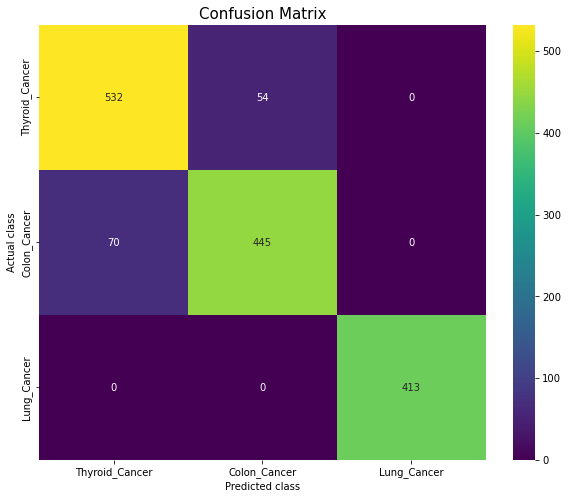

In [53]:
#confusion_matrix
plt.figure(figsize=(10,8))
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,cmap='viridis',fmt='d',
            xticklabels=['Thyroid_Cancer','Colon_Cancer','Lung_Cancer'],
            yticklabels=['Thyroid_Cancer','Colon_Cancer','Lung_Cancer'])
plt.title("Confusion Matrix", fontsize=15)
plt.ylabel('Actual class', fontsize=10)
plt.xlabel('Predicted class', fontsize=10)
plt.show()


In [54]:
# create an empty dataframe to store the scores for various classification algorithms
score_card = pd.DataFrame(columns=['Model','Precision Score', 'Recall Score', 'Accuracy Score', 'f1-score'])

# append the result table for all performance scores
# performance measures considered for comparision are  'Precision', 'Recall','Accuracy', and 'f1-score'
# compile the required information in a user defined function 
def update_score_card(model_name):
    
    # assign 'score_card' as global variable
    global score_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = score_card.append({'Model': model_name,
                                    'Precision Score': metrics.precision_score(y_test, y_pred,average='micro'),
                                    'Recall Score': metrics.recall_score(y_test, y_pred,average='micro'),
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred,average='micro')}, 
                                    ignore_index = True)
    return(score_card)

In [55]:
# use the function 'update_score_card' to store the performance measures
# pass the 'Logistic Regression' as model name to the function
update_score_card(model_name = 'Logistic Regression')

,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.918098,0.918098,0.918098,0.918098


# RandomForestClassifier

In [56]:

#Import the RandomForestClassifier algortihm
from sklearn.ensemble import RandomForestClassifier
#install the Classifier model
RF_model=RandomForestClassifier()
#Fit the train data to the model
RF_model.fit(X_train,y_train)

RandomForestClassifier()

In [57]:
#Prediction of the RandomForestClassifier algorithm
y_pred=RF_model.predict(X_test)
y_pred


array([1, 1, 0, ..., 0, 2, 2], dtype=int64)

In [58]:
#Classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       586
           1       1.00      1.00      1.00       515
           2       1.00      1.00      1.00       413

    accuracy                           1.00      1514
   macro avg       1.00      1.00      1.00      1514
weighted avg       1.00      1.00      1.00      1514



In [59]:
#Classification report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       586
           1       1.00      1.00      1.00       515
           2       1.00      1.00      1.00       413

    accuracy                           1.00      1514
   macro avg       1.00      1.00      1.00      1514
weighted avg       1.00      1.00      1.00      1514



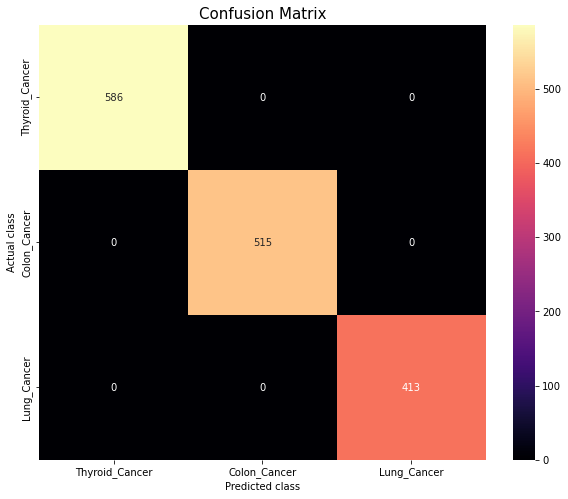

In [60]:
#confusion_matrix
plt.figure(figsize=(10,8))
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,cmap='magma',fmt='d',
            xticklabels=['Thyroid_Cancer','Colon_Cancer','Lung_Cancer'],
            yticklabels=['Thyroid_Cancer','Colon_Cancer','Lung_Cancer'])
plt.title("Confusion Matrix", fontsize=15)
plt.ylabel('Actual class', fontsize=10)
plt.xlabel('Predicted class', fontsize=10)
plt.show()


In [61]:
# use the function 'update_score_card' to store the performance measures
# pass the  model name to the function
update_score_card(model_name = 'Random Forest')

,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.918098,0.918098,0.918098,0.918098
1,Random Forest,1.000000,1.000000,1.000000,1.000000


# Multinomial Naive Bayes


**The Multinomial Naive Bayes algorithm is a popular Bayesian learning method in Natural Language Processing (NLP).** 
**Using the Bayes theorem, the programme guesses the tag of a text.**
**It computes the likelihood of each tag for a given sample and returns the tag with the highest chance.**

In [62]:
#Import the MultinomialNB algorithm to train the our model
from sklearn.naive_bayes import MultinomialNB
#install the model
NB_model=MultinomialNB()
#fit the train data to our model
NB_model.fit(X_train,y_train)


MultinomialNB()

In [63]:
#Prediction to the test data MultinomialNB
y_pred=NB_model.predict(X_test)
y_pred

array([1, 1, 0, ..., 0, 2, 2], dtype=int64)

In [64]:
#Classification report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.85      0.91      0.88       586
           1       0.90      0.83      0.86       515
           2       1.00      0.98      0.99       413

    accuracy                           0.90      1514
   macro avg       0.91      0.91      0.91      1514
weighted avg       0.91      0.90      0.90      1514



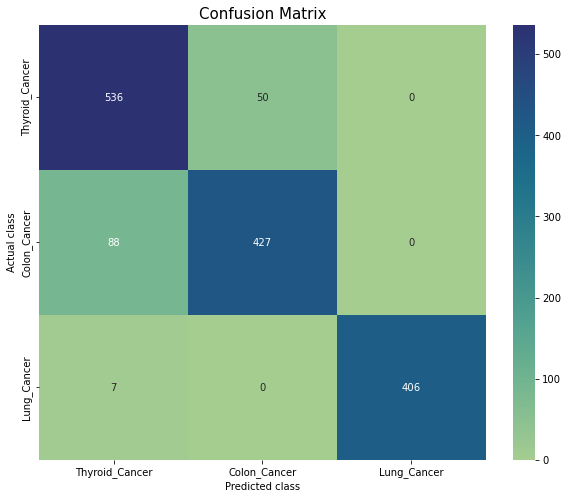

In [65]:
#confusion_matrix
plt.figure(figsize=(10,8))
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,cmap='crest', fmt ='d',
            xticklabels=['Thyroid_Cancer','Colon_Cancer','Lung_Cancer'],
            yticklabels=['Thyroid_Cancer','Colon_Cancer','Lung_Cancer'])
plt.title("Confusion Matrix", fontsize=15)
plt.ylabel('Actual class', fontsize=10)
plt.xlabel('Predicted class', fontsize=10)
plt.show()


In [66]:
update_score_card(model_name = 'Multinomial Naive Bayes')

,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.918098,0.918098,0.918098,0.918098
1,Random Forest,1.000000,1.000000,1.000000,1.000000
2,Multinomial Naive Bayes,0.904227,0.904227,0.904227,0.904227


## XGBoost **Classifier**

**XGBoost is a version of gradient boosted decision tree classifier. In boosting, the trees are built sequentially such that each subsequent tree aims to reduce the errors of the previous tree. These subsequent trees are called base or weak learners. Each of these weak learners contributes some vital information for prediction, enabling the boosting technique to produce a strong learner by effectively combining these weak learners.**

In [67]:
#Import the XGBClassifier model 
from xgboost import XGBClassifier
XGB_model=XGBClassifier()
# fit the data to train data
XGB_model.fit(X_train,y_train)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [68]:
#Prediction to the test data XGBClassifier
y_pred=XGB_model.predict(X_test)
y_pred


array([1, 1, 0, ..., 0, 2, 2], dtype=int64)

In [69]:
#Classification report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       586
           1       1.00      1.00      1.00       515
           2       1.00      1.00      1.00       413

    accuracy                           1.00      1514
   macro avg       1.00      1.00      1.00      1514
weighted avg       1.00      1.00      1.00      1514



In [70]:
update_score_card(model_name = 'XGBoost Classifier')

,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.918098,0.918098,0.918098,0.918098
1,Random Forest,1.000000,1.000000,1.000000,1.000000
2,Multinomial Naive Bayes,0.904227,0.904227,0.904227,0.904227
3,XGBoost Classifier,1.000000,1.000000,1.000000,1.000000



## Support vector Classifier

**Support Vector Machine(SVM) is a supervised machine learning algorithm used for both classification and regression. The objective of SVM algorithm is to find a hyperplane in an N-dimensional space that distinctly classifies the data points**

In [71]:
#Import the  model and install the model
from sklearn.svm import SVC
#install the 
SVM_model=SVC()
#And finally fit the data to train data
SVM_model.fit(X_train,y_train)


SVC()

In [72]:
#Prediction to the test data 
y_pred=SVM_model.predict(X_test)
y_pred


array([1, 1, 0, ..., 0, 2, 2], dtype=int64)

In [73]:
#Classification report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.87      0.89      0.88       586
           1       0.87      0.85      0.86       515
           2       1.00      1.00      1.00       413

    accuracy                           0.90      1514
   macro avg       0.91      0.91      0.91      1514
weighted avg       0.90      0.90      0.90      1514



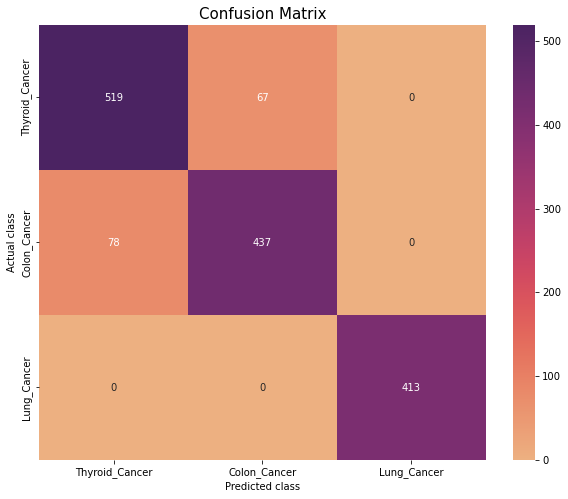

In [74]:
#confusion_matrix
plt.figure(figsize=(10,8))
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,cmap='flare',fmt='d',
            xticklabels=['Thyroid_Cancer','Colon_Cancer','Lung_Cancer'],
            yticklabels=['Thyroid_Cancer','Colon_Cancer','Lung_Cancer'])
plt.title("Confusion Matrix", fontsize=15)
plt.ylabel('Actual class', fontsize=10)
plt.xlabel('Predicted class', fontsize=10)
plt.show()


In [75]:
update_score_card(model_name = 'SVM Classifier')

,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.918098,0.918098,0.918098,0.918098
1,Random Forest,1.000000,1.000000,1.000000,1.000000
2,Multinomial Naive Bayes,0.904227,0.904227,0.904227,0.904227
3,XGBoost Classifier,1.000000,1.000000,1.000000,1.000000
4,SVM Classifier,0.904227,0.904227,0.904227,0.904227


## K-Neighbors Classifier

**K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.**

In [76]:
from sklearn.neighbors import KNeighborsClassifier


In [77]:
# instantiate the 'KNeighborsClassifier'
# n_neighnors: number of neighbors to consider
knn_classification = KNeighborsClassifier(n_neighbors = 3)

# fit the model using fit() on train data
model = knn_classification.fit(X_train, y_train)

In [78]:
y_pred = model.predict(X_test)

In [79]:
#Classification report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       586
           1       1.00      1.00      1.00       515
           2       1.00      1.00      1.00       413

    accuracy                           1.00      1514
   macro avg       1.00      1.00      1.00      1514
weighted avg       1.00      1.00      1.00      1514



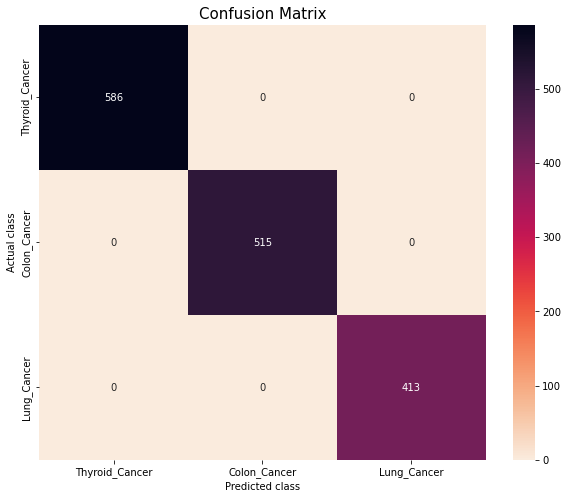

In [80]:
#confusion_matrix
plt.figure(figsize=(10,8))
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,cmap='rocket_r',fmt='d',
            xticklabels=['Thyroid_Cancer','Colon_Cancer','Lung_Cancer'],
            yticklabels=['Thyroid_Cancer','Colon_Cancer','Lung_Cancer'])
plt.title("Confusion Matrix", fontsize=15)
plt.ylabel('Actual class', fontsize=10)
plt.xlabel('Predicted class', fontsize=10)
plt.show()


In [81]:
update_score_card(model_name = 'KNN Classifier')

,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.918098,0.918098,0.918098,0.918098
1,Random Forest,1.000000,1.000000,1.000000,1.000000
2,Multinomial Naive Bayes,0.904227,0.904227,0.904227,0.904227
3,XGBoost Classifier,1.000000,1.000000,1.000000,1.000000
4,SVM Classifier,0.904227,0.904227,0.904227,0.904227
5,KNN Classifier,1.000000,1.000000,1.000000,1.000000


In [82]:
score_card

,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.918098,0.918098,0.918098,0.918098
1,Random Forest,1.000000,1.000000,1.000000,1.000000
2,Multinomial Naive Bayes,0.904227,0.904227,0.904227,0.904227
3,XGBoost Classifier,1.000000,1.000000,1.000000,1.000000
4,SVM Classifier,0.904227,0.904227,0.904227,0.904227
5,KNN Classifier,1.000000,1.000000,1.000000,1.000000


# CONCLUSION

#### The Random Forest, XGBoost Classifier, KNN Classifier give the best result to the model.